### Task 2: Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [2]:
ad=pd.read_csv("Advertising.csv")
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [4]:
ad.drop(columns=["Unnamed: 0"], index=1, inplace=True)

In [5]:
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


### Task 4: Exploratory Data Analysis

In [6]:
import seaborn as sns

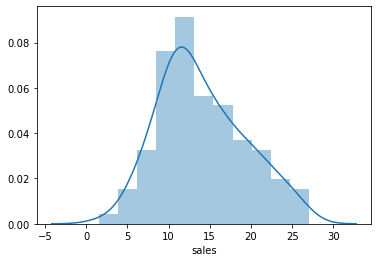

In [7]:
sns.distplot(ad["sales"])

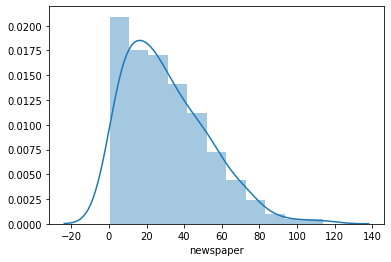

In [8]:
sns.distplot(ad["newspaper"])

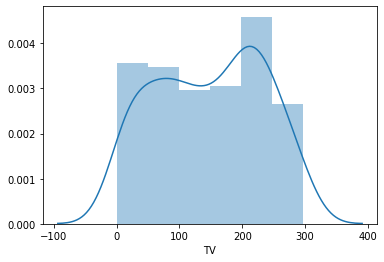

In [9]:
sns.distplot(ad["TV"])

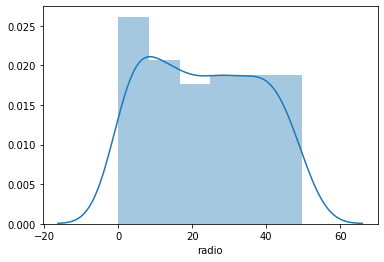

In [10]:
sns.distplot(ad["radio"])

### Task 5: Exploring Relationships between Predictors and Response

Text(0.5, 1.0, 'Regression')

<Figure size 864x864 with 0 Axes>

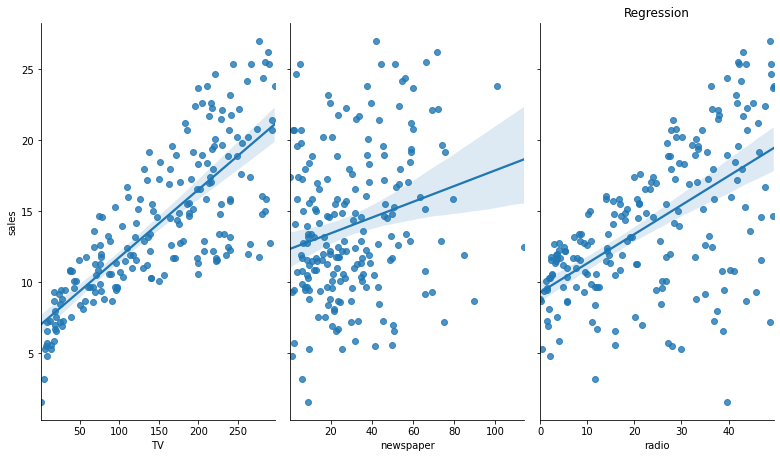

In [11]:
plt.figure(figsize=(12,12))
sns.pairplot(data=ad,x_vars=["TV","newspaper","radio"],y_vars="sales",aspect=0.6, height=6,kind="reg")
plt.title("Regression")

In [12]:
ad["TV"].corr(ad["sales"])

0.7818065470716108

In [13]:
correlation=ad.corr()
correlation

,TV,radio,newspaper,sales
TV,1.000000,0.061728,0.060965,0.781807
radio,0.061728,1.000000,0.351894,0.582436
newspaper,0.060965,0.351894,1.000000,0.231183
sales,0.781807,0.582436,0.231183,1.000000


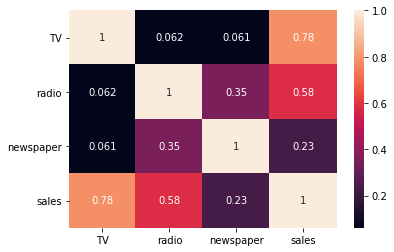

In [14]:
sns.heatmap(data=correlation,annot=True)

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [15]:
x=ad[["TV"]]

In [16]:
#X=np.array(x)
#X=X.reshape(-1,1)
#or
x=ad[["TV"]]# ==> For two Dimensional

In [17]:
x.shape

(199, 1)

In [18]:
y=ad[["sales"]]

In [19]:
y.shape

(199, 1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [21]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(149, 1) (50, 1) (149, 1) (50, 1)


In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
import pickle

In [24]:
pickle.dump(model,open("sales1.pkl", "wb"))

In [25]:
model.predict([[26]])

array([[8.37745434]])

In [26]:
mymodel=pickle.load(open("sales1.pkl","rb"))

In [27]:
mymodel.predict([[26]])

array([[8.37745434]])

In [28]:
from sklearn.preprocessing import StandardScaler
x_scalor=StandardScaler()
x_train_scaled=x_scalor.fit_transform(x)

y_scalor=StandardScaler()
y_train_scaled=y_scalor.fit_transform(y)


In [29]:
from sklearn.model_selection import train_test_split
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(x_train_scaled,y_train_scaled,random_state=1,test_size=0.25)

In [30]:
print(scaled_x_train.shape,scaled_x_test.shape,scaled_y_train.shape,scaled_y_test.shape)

(149, 1) (50, 1) (149, 1) (50, 1)


In [31]:
from sklearn.linear_model import LinearRegression
scaled_model=LinearRegression()
scaled_model.fit(x_train_scaled,y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 7: Interpreting Model Coefficients

In [32]:
model.intercept_

array([7.19128089])

In [33]:
model.coef_

array([[0.04562206]])

In [34]:
scaled_model.intercept_

array([-1.99182027e-16])

In [35]:
scaled_model.coef_

array([[0.78180655]])

### Task 8: Making Predictions with our Model

In [36]:
y_pred=model.predict(x_test)

In [37]:
scaled_y_pred=scaled_model.predict(scaled_x_test)

### Task 9: Model Evaluation Metrics

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [39]:
mae=mean_absolute_error(y_test,y_pred)
print("Model_MAE:",mae)
scale_mae=mean_absolute_error(scaled_y_test,scaled_y_pred)
print("Scaled MAE",scale_mae)

Model_MAE: 2.310716014725114
Scaled MAE 0.42853777498766105


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [40]:
mse=mean_squared_error(y_test,y_pred)
print("Model_MSE:",mse)
scale_mse=mean_squared_error(scaled_y_test,scaled_y_pred)
print("Scaled MSE",scale_mse)

Model_MSE: 9.372483220374466
Scaled MSE 0.334430494269573


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [41]:
rmse=np.sqrt(mse)
print("model RMSE",rmse)

model RMSE 3.0614511625003047


In [42]:
scaled_rmse=np.sqrt(scale_mse)
print("Scaled RMSE",scaled_rmse)

Scaled RMSE 0.5782996578501262


In [43]:
print("Model Score",model.score(x_test,y_test))

Model Score 0.6876390764173508


In [44]:
print("Scaled Model Score:",scaled_model.score(scaled_x_test,scaled_y_test))

Scaled Model Score: 0.6973316766556641


In [46]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

    

Python version
3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
